# Softmax Regression Implementation from Scratch



In [1]:
import torch
from d2l import torch as d2l

Given a matrix `X` we can sum over all elements (by default) or only
over elements in the same axis

In [2]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

$$\mathrm{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}$$

In [3]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition

We turn each element into a non-negative number.
Each row sums up to 1

In [4]:
X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.1892, 0.1919, 0.2042, 0.2413, 0.1734],
         [0.1454, 0.2111, 0.2180, 0.2442, 0.1813]]),
 tensor([1.0000, 1.0000]))

The softmax regression model.
We flatten each image,
treating them as vectors of length 784.
Since our dataset has 10 classes,
our network has an output dimension of 10

In [6]:
class SoftmaxRegressionScratch(d2l.Classification):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    return softmax(torch.matmul(X.reshape((-1, self.W.shape[0])), self.W) + self.b)

Create sample data `y_hat`
with 2 examples of predicted probabilities over 3 classes and their corresponding labels `y`.
Using `y` as the indices of the probabilities in `y_hat`

In [7]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

Implement the cross-entropy loss function

In [8]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

In [9]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

Train the model with 10 epochs

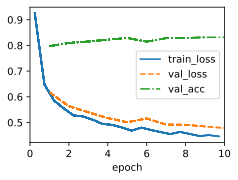

In [10]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

Classify some images

In [11]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

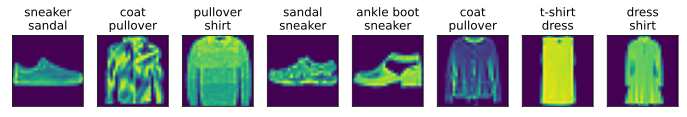

In [12]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)